In [2]:
import pandas as pd
df = pd.read_csv('hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [3]:
X = df.drop('test_result',axis=1)
y =df['test_result']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.coef_

array([[-0.9701145 ,  3.57047868]])

In [12]:
y_pred_binary = model.predict(X_test)
y_pred_binary

array([1, 0, 1, ..., 1, 1, 1])

In [13]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.03677504, 0.96322496],
       [0.97978099, 0.02021901],
       [0.03052936, 0.96947064],
       ...,
       [0.01172714, 0.98827286],
       [0.06724683, 0.93275317],
       [0.00110592, 0.99889408]])

In [ ]:
# age -> 0.9701145  physical_score --> 3.57047868
# 3.57047868 when physical_score increases also  
# prob to pass the test increases vice versa for the age 
# when the when age increase prob of passing he test decreases
model.coef_

array([[-0.9701145 ,  3.57047868]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test , y_pred_binary)


0.9053333333333333

In [15]:
confusion_matrix(y_test , y_pred_binary)

array([[525,  84],
       [ 58, 833]])

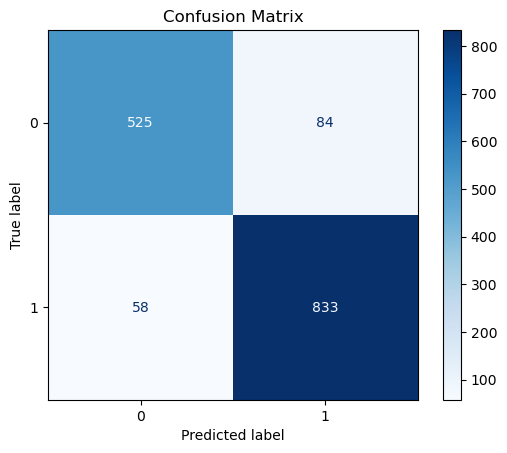

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [19]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       609
           1       0.91      0.93      0.92       891

    accuracy                           0.91      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.91      0.91      0.90      1500



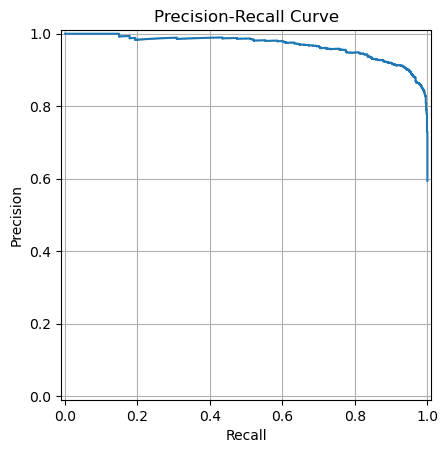

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Step 1: Get the predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]  # For binary classification

# Step 2: Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Step 3: Plot the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()